In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import soundfile as sf
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from IPython.display import Audio
from natsort import natsorted
from scipy.signal import stft
from librosa import resample
import librosa as lr

from joblib import Parallel, delayed
from datetime import datetime, timedelta


import alphaMusic.evaluation as evl
import alphaMusic.utils.fls_utils as fls
import alphaMusic.utils.acu_utils as acu
import alphaMusic.utils.geo_utils as geo
import alphaMusic.utils.mat_utils as mat

from alphaMusic.dataloaders import LocataDataset
from pyroomacoustics.datasets.locata import LOCATA, _find_ts


from IPython.display import Audio

In [40]:
path_to_locata = Path('..','data','Locata','dev')
print(path_to_locata.exists())

tasks = [2]
arrays = ['benchmark2']

dB = LOCATA(path_to_locata, verbose=True, tasks=tasks, arrays=arrays)

True
../data/Locata/dev/task2/recording1/benchmark2


/home/dicarlo_d/Documents/Code/alphaMUSIC/pyroomacoustics/pyroomacoustics/datasets/locata.py:153: UserWarning: The eval folder is missing. Please check the structure of the dataset directory.
  warnings.warn('The ''eval'' folder is missing. Please check the structure of the dataset directory.')


../data/Locata/dev/task2/recording3/benchmark2


Recording #0


 15%|███████████▉                                                                      | 24/165 [00:04<00:28,  4.97it/s]

2
2
2
2


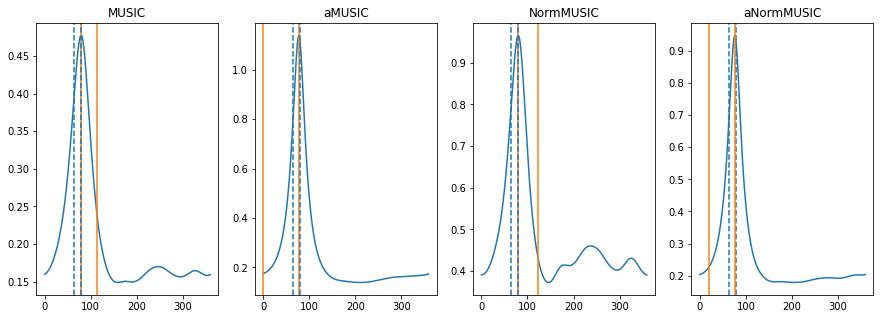

 15%|████████████▍                                                                     | 25/165 [00:05<00:45,  3.07it/s]

2
2
2
2


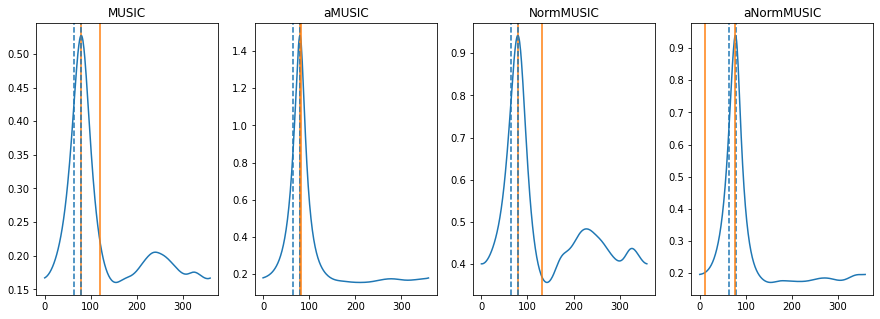

 16%|████████████▉                                                                     | 26/165 [00:06<00:57,  2.41it/s]

2
2
2
2


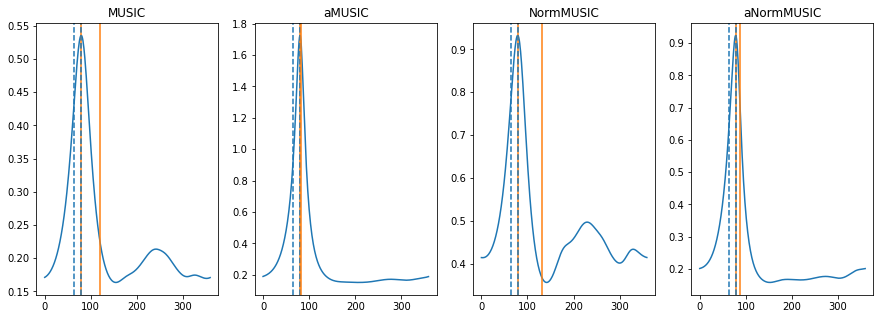

 16%|█████████████▍                                                                    | 27/165 [00:06<01:06,  2.09it/s]

2
2
2
2


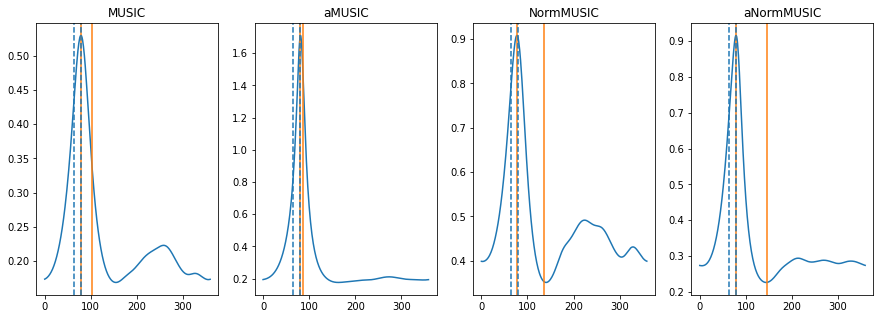

 17%|█████████████▉                                                                    | 28/165 [00:07<01:11,  1.91it/s]

2
2
2
2


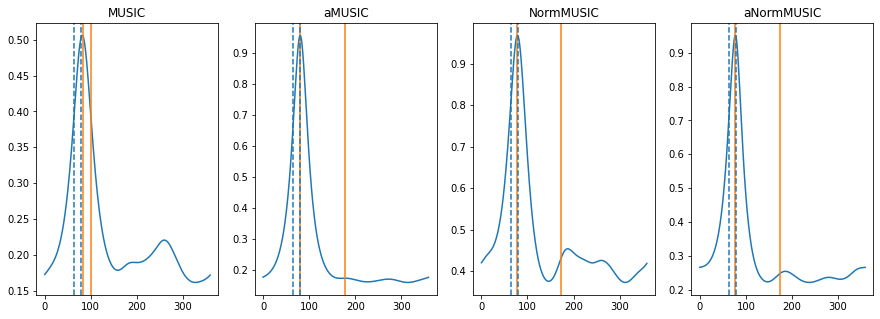

 18%|██████████████▍                                                                   | 29/165 [00:07<01:15,  1.80it/s]

2
2
2
2


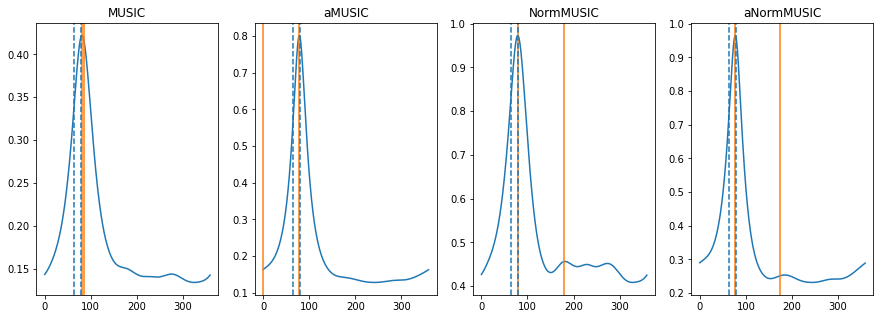

 18%|██████████████▉                                                                   | 30/165 [00:08<01:19,  1.70it/s]

2
2
2
2


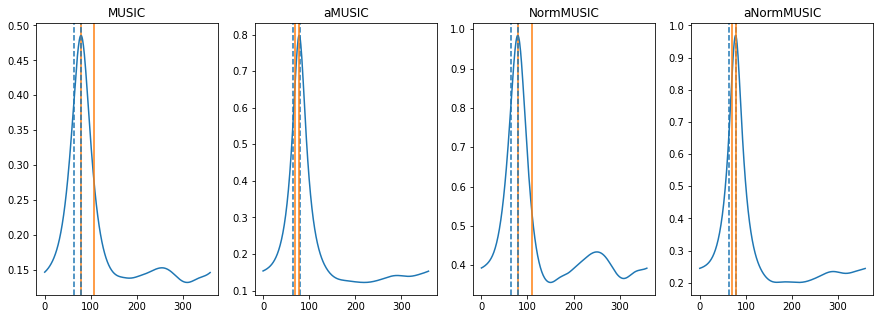

 19%|███████████████▍                                                                  | 31/165 [00:09<01:20,  1.67it/s]

2
2
2
2


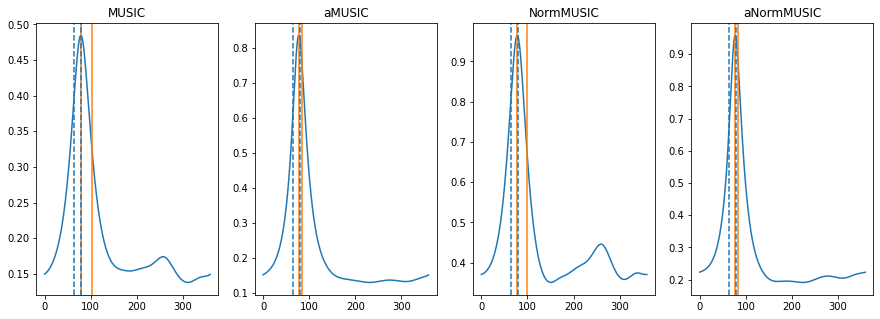

 19%|███████████████▉                                                                  | 32/165 [00:09<01:20,  1.64it/s]

2
2
2
2


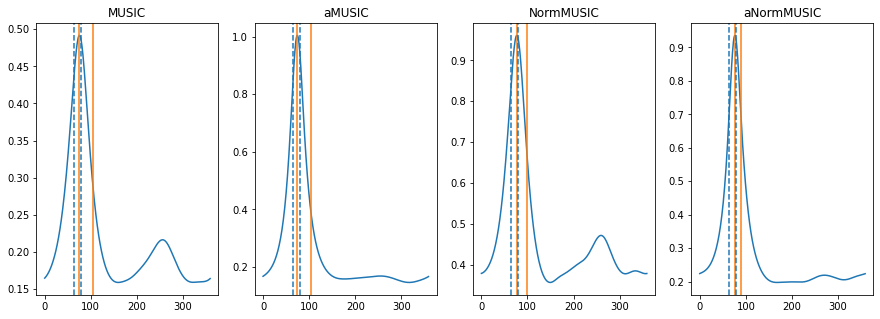

 20%|████████████████▍                                                                 | 33/165 [00:10<01:21,  1.63it/s]

2
2
2
2


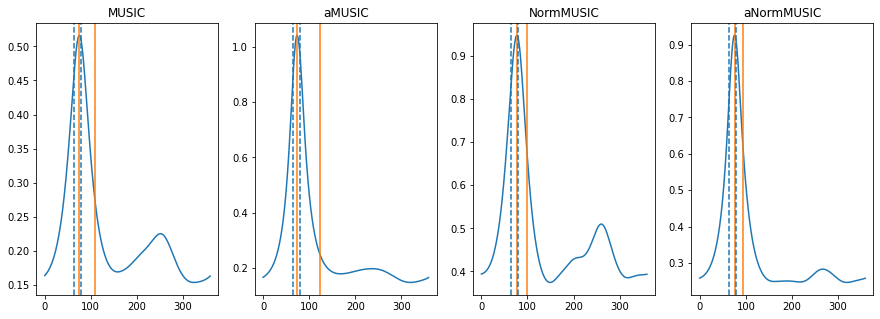

 21%|████████████████▉                                                                 | 34/165 [00:11<01:20,  1.62it/s]

2
2
2
2


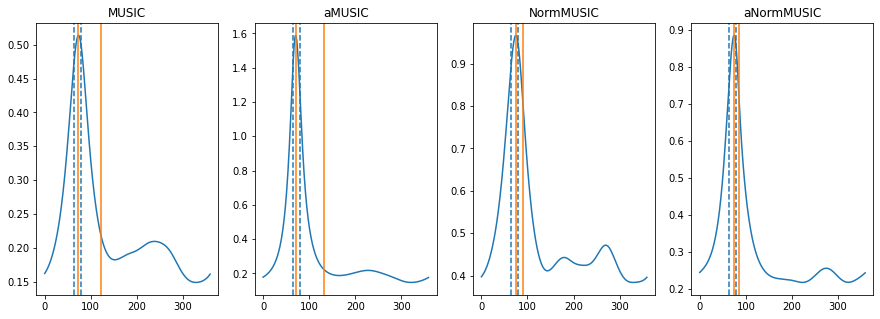

 21%|█████████████████▍                                                                | 35/165 [00:11<01:20,  1.61it/s]

2
2
2
2


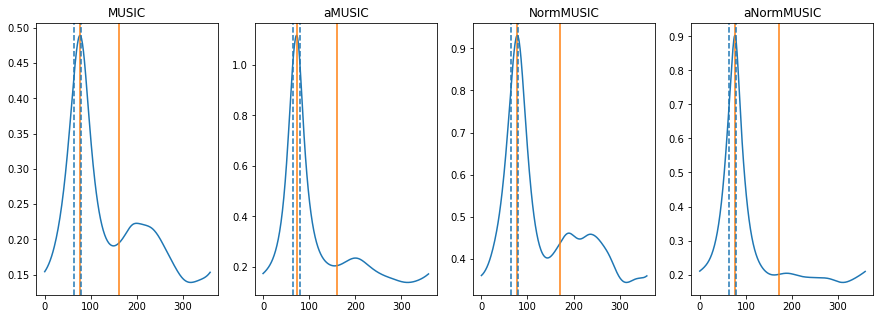

 22%|█████████████████▉                                                                | 36/165 [00:12<01:42,  1.25it/s]

2
2
2
2


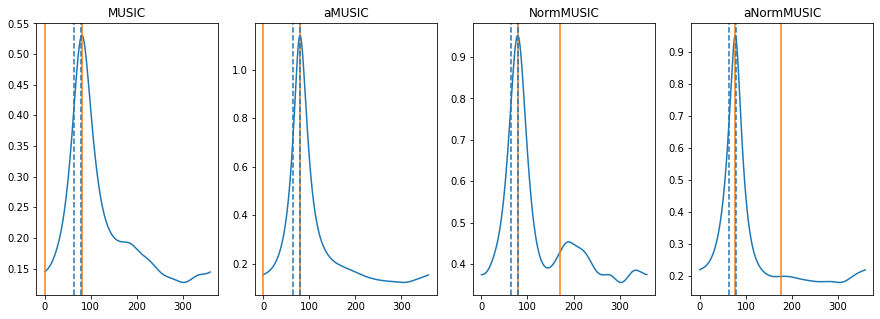

 22%|██████████████████▍                                                               | 37/165 [00:13<01:35,  1.35it/s]

2
2
2
2


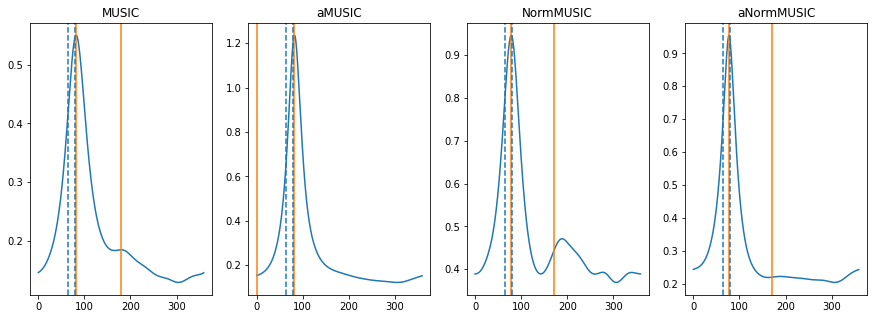

 23%|██████████████████▉                                                               | 38/165 [00:14<01:28,  1.43it/s]

2
2
2
2


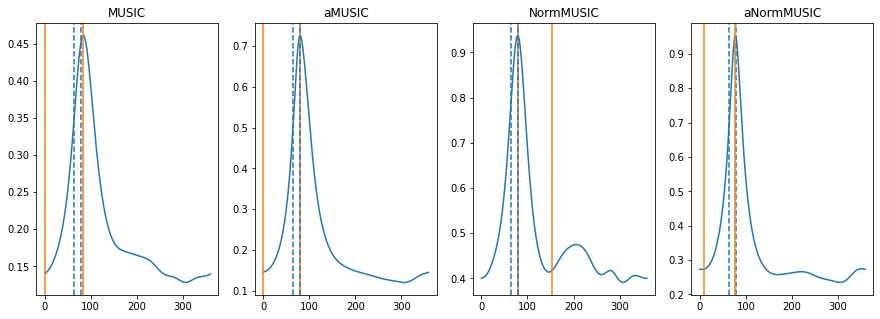

 24%|███████████████████▍                                                              | 39/165 [00:14<01:24,  1.49it/s]

2
2
2
2


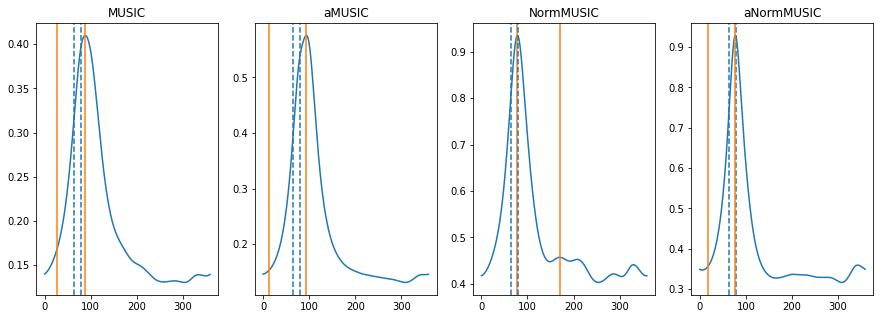

 24%|███████████████████▉                                                              | 40/165 [00:15<01:21,  1.53it/s]

2
2
2
2


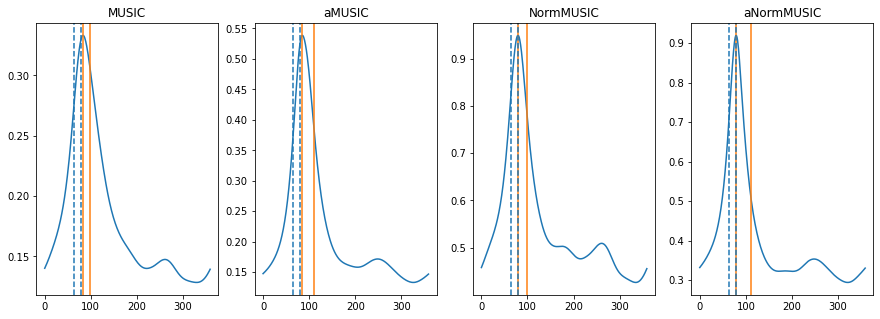

 25%|████████████████████▍                                                             | 41/165 [00:16<01:19,  1.56it/s]

2
2
2
2


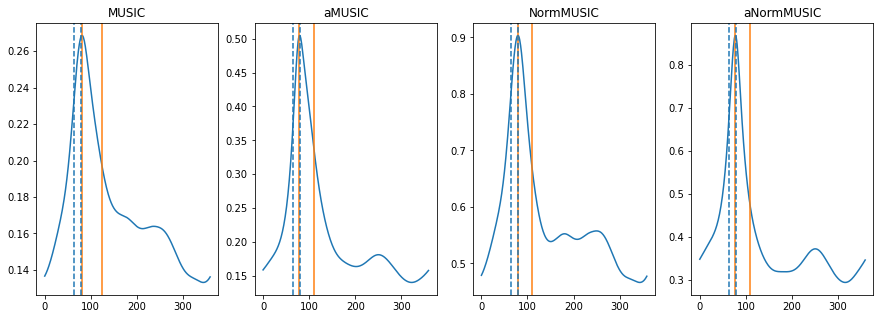

 25%|████████████████████▊                                                             | 42/165 [00:16<01:17,  1.58it/s]

1
1
1
1


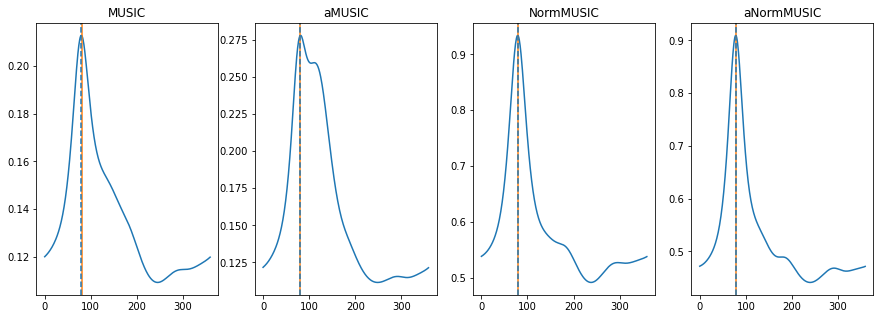

 26%|█████████████████████▎                                                            | 43/165 [00:17<01:15,  1.61it/s]

1
1
1
1


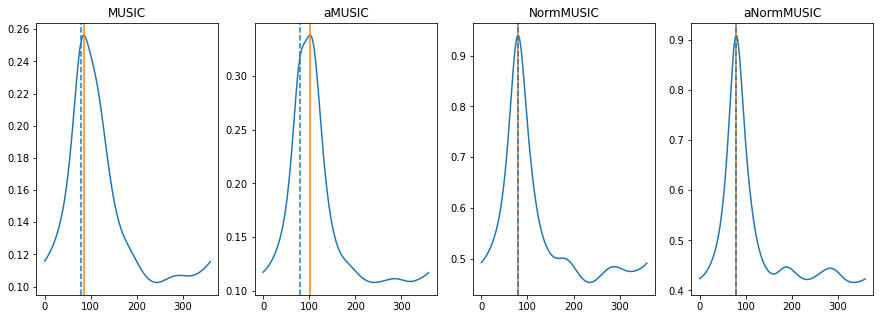

 27%|█████████████████████▊                                                            | 44/165 [00:17<01:14,  1.63it/s]

1
1
1
1


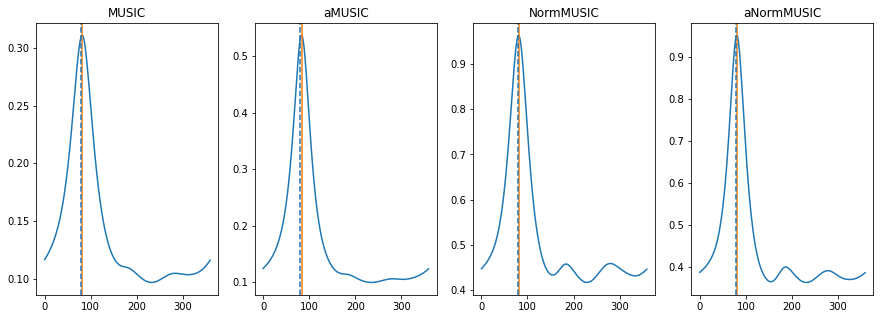

 27%|██████████████████████▎                                                           | 45/165 [00:18<01:13,  1.64it/s]

1
1
1
1


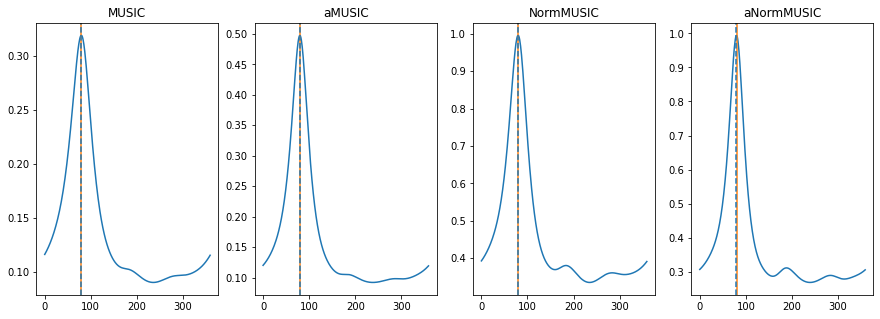

 28%|██████████████████████▊                                                           | 46/165 [00:19<01:12,  1.64it/s]

1
1
1
1


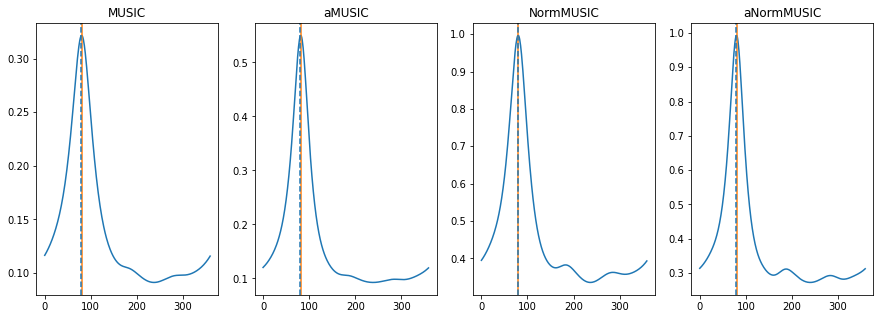

 28%|███████████████████████▎                                                          | 47/165 [00:19<01:11,  1.65it/s]

2
2
2
2


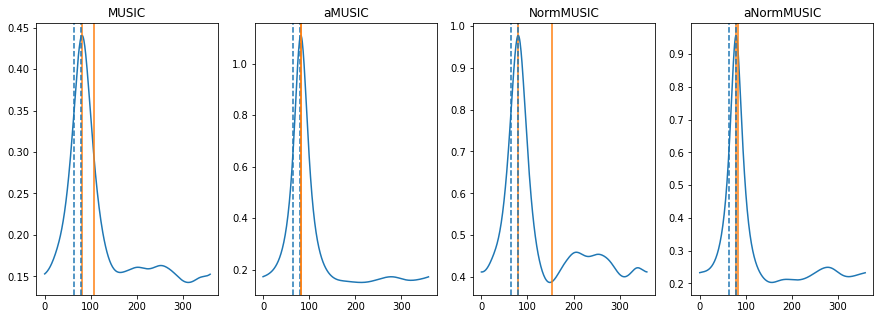

 29%|███████████████████████▊                                                          | 48/165 [00:20<01:12,  1.62it/s]

2
2
2
2


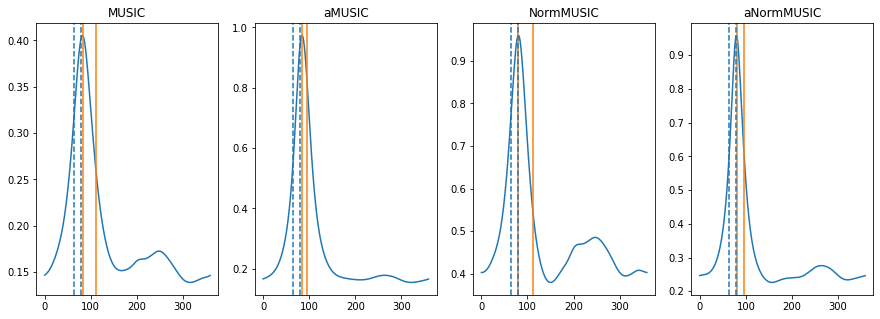

 30%|████████████████████████▎                                                         | 49/165 [00:20<01:11,  1.62it/s]

2
2
2
2


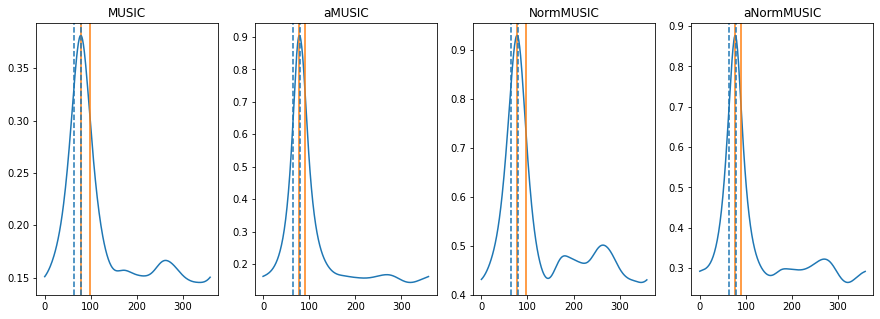

 30%|████████████████████████▊                                                         | 50/165 [00:21<01:11,  1.62it/s]

2
2
2
2


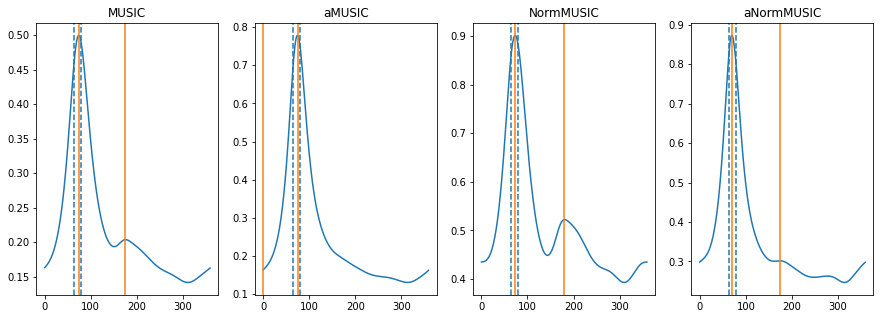

 31%|█████████████████████████▎                                                        | 51/165 [00:22<01:10,  1.61it/s]

2
2
2
2


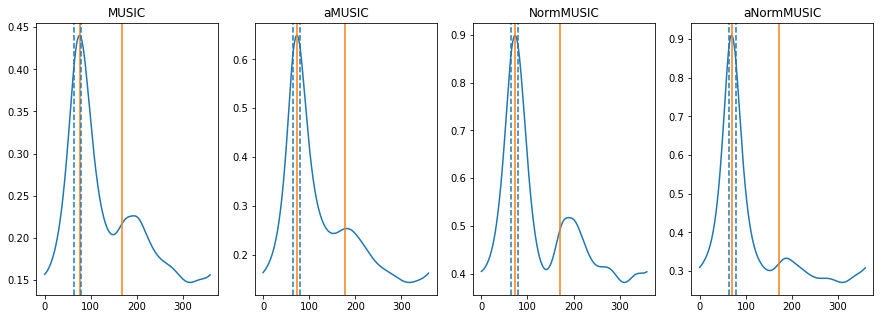

 32%|█████████████████████████▊                                                        | 52/165 [00:22<01:09,  1.62it/s]

2
2
2
2


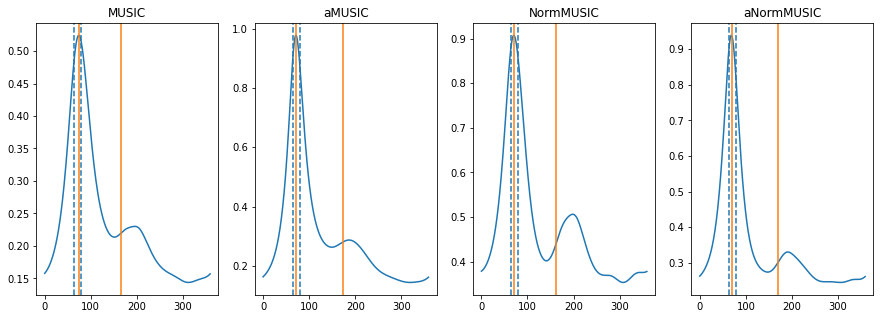

 32%|██████████████████████████▎                                                       | 53/165 [00:23<01:09,  1.61it/s]

2
2
2
2


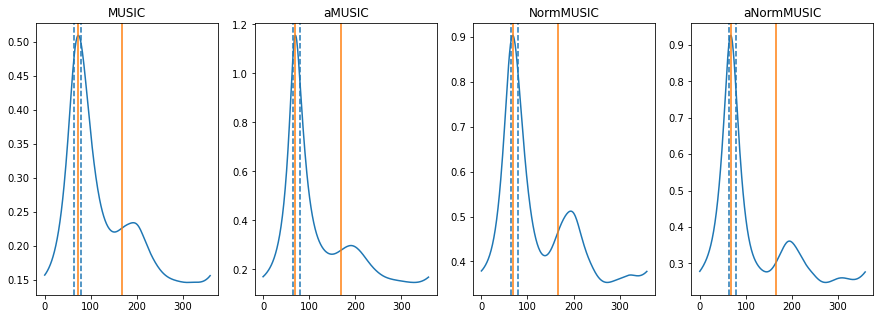

 33%|██████████████████████████▊                                                       | 54/165 [00:24<01:09,  1.59it/s]

2
2
2
2


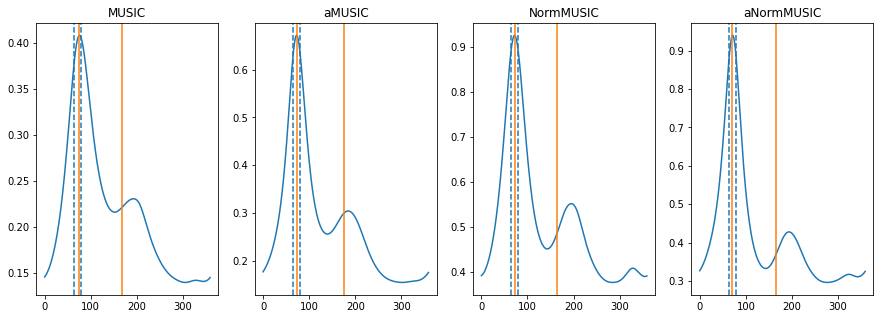

 33%|███████████████████████████▎                                                      | 55/165 [00:24<01:08,  1.60it/s]

2
2
2
2


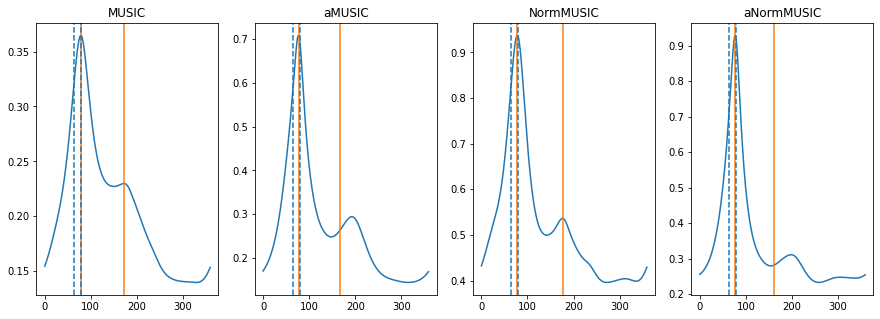

 34%|███████████████████████████▊                                                      | 56/165 [00:25<01:07,  1.61it/s]

2
2
2
2


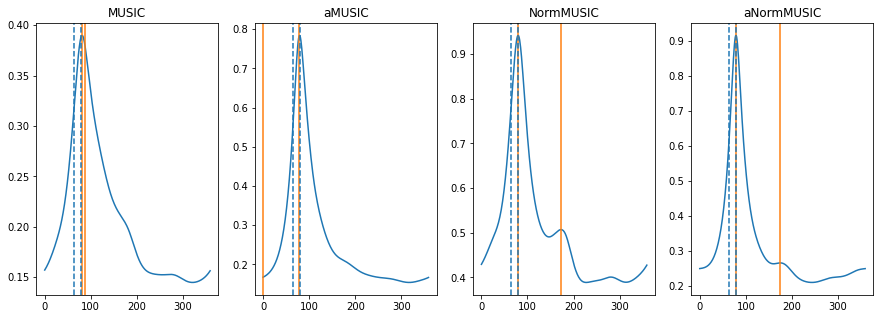

 35%|████████████████████████████▎                                                     | 57/165 [00:25<01:07,  1.61it/s]

2
2
2
2


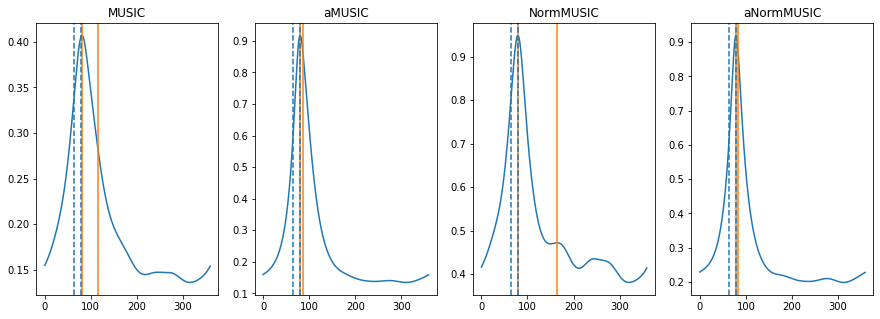

 35%|████████████████████████████▊                                                     | 58/165 [00:26<01:06,  1.61it/s]

2
2
2
2


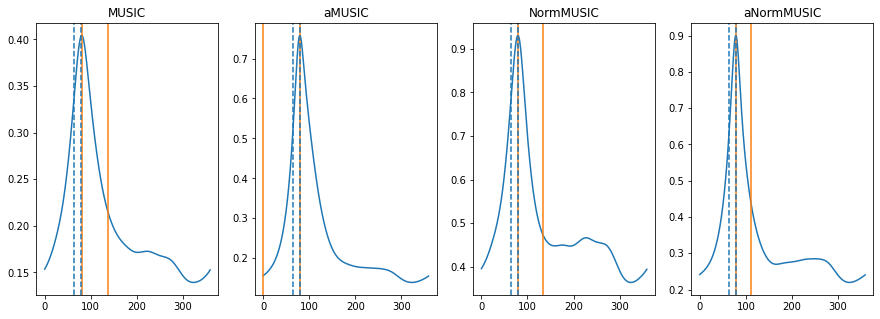

 36%|█████████████████████████████▎                                                    | 59/165 [00:27<01:05,  1.61it/s]

2
2
2
2


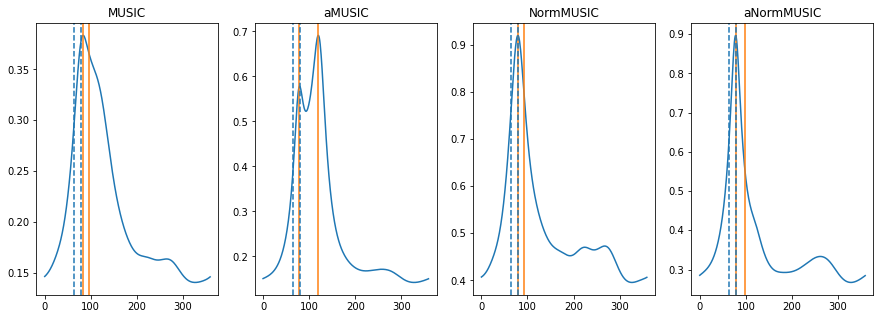

 36%|█████████████████████████████▊                                                    | 60/165 [00:27<00:48,  2.15it/s]


KeyboardInterrupt: 

<Figure size 1080x360 with 0 Axes>

In [42]:
results = pd.DataFrame()

# LOCATA PARAMS
Fs = 48000  
nfft = 1024
frame_num = 100
frame_hop = 10

frame_sec = 0.03
frame_size = int(Fs * frame_sec)

minF = 500
maxF = 4000

for r, recordings in enumerate(dB.recordings):
    
    if r in [1]: continue
            
    task = recordings.meta.task
    array = recordings.meta.array
    rec = recordings.meta.rec
    
    print(f'Recording #{r}')
    
    data = recordings.data
    fs = recordings.fs
    timestamps = recordings.ts
    
    name_srcs = list(recordings.sources.keys())
    num_srcs = len(name_srcs)
    
    
    # Resample VAD
    vads = {}
    for src in name_srcs:
        v = recordings.sources[src]['vad']
        vads[src] = v
        
    # Resample 48kHz -> 16kHz
    # data = resample(data.T, orig_sr=fs, target_sr=Fs)
    data = data.T

    if arrays[0] == 'dicit':
        sub_array = [2,3,4,5,6,8,9,10,11]
        data = data[sub_array,:]
    
    # STFT
    freqs, times, stft_signals = stft(data, fs=Fs, nfft=nfft, nperseg=frame_size//4, noverlap=0)
    
    M, F, T = stft_signals.shape
    
    # iterate over frames
    starting_timestamp = recordings.get_ts(0)
    row = 0
    

    for t in tqdm(range(10, T-10, 5)):
        
        ts = times[t]
        ts = starting_timestamp + timedelta(seconds=ts)
        
        results.at[row, 'timestamp'] = times[t]
        
        mic_pos = recordings.get_array(ts)
        
        if arrays[0] == 'dicit':
            mic_pos = mic_pos[:,sub_array]
        
        doa_dict = recordings.get_doa(ts)

        doas = {}
        
        num_srcs = 0
        doas_true = []
                
        for s, src in enumerate(doa_dict.keys()):
                
            azimuth = np.rad2deg(doa_dict[src]['azimuth'])

            doas[src] = azimuth
            doas_true.append(azimuth)
            
            idx = _find_ts(timestamps, ts)
            results.at[row, f'VAD_{s}'] = vads[src][idx]
            num_srcs += vads[src][idx]
        
            results.at[row, f'DOA_{s}'] = azimuth
        
        num_srcs = int(num_srcs)
        results.at[row, 'J'] = num_srcs

        if num_srcs == 0:
            row += 1
            continue

        from pyroomacoustics.doa import MUSIC, NormMUSIC, SRP
        from alphaMusic.alphaMUSIC import aMUSIC
        
        if array == 'dicit':
            doa_grid = np.arange(180,step=1)
        elif array == 'dummy':
            doa_grid = np.arange(-180, 180,step=1)
        else:
            doa_grid = np.arange(0, 360,step=1)
            
        kwargs = {'L': mic_pos,
                  'fs': Fs, 
                  'nfft': nfft,
                  'azimuth': np.deg2rad(doa_grid),
                  'num_src': num_srcs,
        }
        
        algorithms = {
            'MUSIC': MUSIC(**kwargs),
            'aMUSIC' : aMUSIC(**kwargs,alpha=3,frequency_normalization=False),
            'NormMUSIC': NormMUSIC(**kwargs),
            'aNormMUSIC' : aMUSIC(**kwargs,alpha=3,frequency_normalization=True),
#             'SRP_PHAT' : SRP(**kwargs),
        }

        plt.figure(figsize=(15,5))
        for a, (algo_name, algo) in enumerate(algorithms.items()):

            algo.locate_sources(stft_signals[:,:,t-10:t+10],
                                num_src=num_srcs, 
                                freq_range=[minF, maxF], 
                                mpd=5)

            doas_estm = np.rad2deg(algo.azimuth_recon)
#             results.at[r, f'DOA_{algo_name}'] = np.array(doas_estm)
            
            doas_est_back = []
            for doa in doas_estm:
                
                if doa > 180:
                    doa = 360 - doa
                doas_est_back.append(doa)

            doas_est = sorted(doas_est_back)

            # append NaN if some sources are not retrieved
            n_missing = num_srcs - len(doas_est)
            for i in range(n_missing):
                doas_est.append(0)

            assert len(doas_est) == num_srcs
            
            print(num_srcs)
            plt.subplot(1,len(algorithms.items()),a+1)
            plt.title(algo_name)
            plt.plot(doa_grid, np.mean(algo.Pssl, 1))
            for i in range(num_srcs):
                plt.axvline(x=doas_est[i], color='C1', linestyle='-')
                plt.axvline(x=doas_true[i], color='C0', linestyle='--')

            for d, doa in enumerate(doas_est):
                results.at[row, f'{algo_name}_{d}'] = doa
            
        plt.show()
        row += 1
    break

In [36]:
results

,timestamp,VAD_0,DOA_0,VAD_1,DOA_1,VAD_2,DOA_2,VAD_3,DOA_3,J,...,NormMUSIC_1,aNormMUSIC_1,MUSIC_2,MUSIC_3,aMUSIC_2,aMUSIC_3,NormMUSIC_2,NormMUSIC_3,aNormMUSIC_2,aNormMUSIC_3
0,0.0750,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1125,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1500,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1875,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2250,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,4.6125,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,4.6500,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,4.6875,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,4.7250,0.0,86.874251,0.0,144.101236,0.0,-22.496756,0.0,-126.15107,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


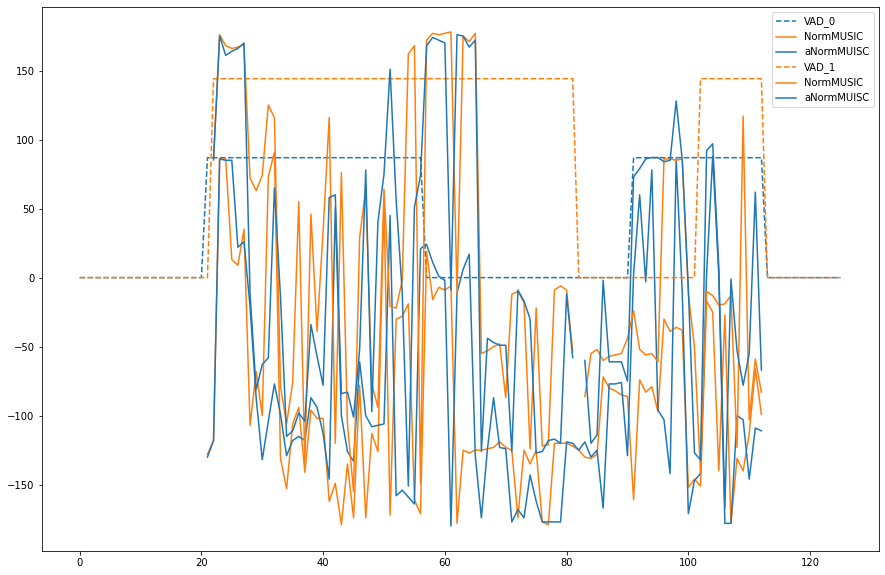

In [37]:
plt.figure(figsize=(15,10))
for src in range(2):
    plt.plot(results[f'DOA_{src}']*results[f'VAD_{src}'], '--', label=f'VAD_{src}')

#     plt.plot(results[f'MUSIC_{src}'], 'C0', label='MUSIC')
#     plt.plot(results[f'NormMUSIC_{src}'], 'C0', label='NormMUSIC')
    
    plt.plot(results[f'NormMUSIC_{src}'], 'C1', label='NormMUSIC')
    plt.plot(results[f'aNormMUSIC_{src}'], 'C0', label='aNormMUISC')
    
#     plt.plot(results[f'SRP_PHAT_{src}'], 'C2', label='SRP_PHAT')
        
plt.legend()

In [ ]:
# fls.save_to_pkl(Path('locata_db_task_{tasks[0]}_array_{arrays[0]}_results.pkl'), results)

In [20]:
MAE, MEDAE = {}, {}

def calc_ae(a,b):
    x = np.abs(a-b)
    return np.min(np.array((x, np.abs(360-x))), axis=0)

for algo_name in algorithms.keys():
    
    src = 0
        
    curr_df = results.loc[(results[f'VAD_{src}'] == 1)]
    curr_df = curr_df.dropna()
    
    ae = calc_ae(curr_df.loc[:,[f"DOA_{src}"]].to_numpy(), 
                 curr_df.loc[:,[f"{algo_name}_{src}"]].to_numpy())
    MAE[algo_name] = np.mean(ae)
    MEDAE[algo_name] = np.median(ae)
    
# err = calc_ae(df.loc[:,["DOA"]].to_numpy(), df.loc[:,["DOAest"]].to_numpy()).squeeze()
# df['Err'] = err
print("Algo \t\t MAE \t MEDAE")
for algo_name in algorithms.keys():
    print(f"{algo_name}\t {MAE[algo_name]:5.2f} \t {MEDAE[algo_name]:5.2f}")

Algo 		 MAE 	 MEDAE
MUSIC	 132.06 	 134.50
aMUSIC	 141.29 	 154.13
NormMUSIC	 132.30 	 144.63
aNormMUSIC	 156.43 	 158.50
